##Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

##Importing Dataset

In [2]:
dataset = pd.read_csv('train.txt', delimiter = '\t', quoting = 3)

In [ ]:
print(len(dataset[dataset.label == 0]), 'Non-Hatred Tweets')
print(len(dataset[dataset.label == 1]), 'Hatred Tweets')

29720 Non-Hatred Tweets
2242 Hatred Tweets


##Cleaning the Text

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', dataset['tweet'][i])
  review = re.sub(r'\d+', '', review)
  review = review.lower()
  review = review.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = [ps.stem(word) for word in review if not word.startswith('user')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
all_words = " ".join(corpus)

In [ ]:
dataset['CORPUS_TWEETS'] = corpus

In [ ]:
hatred_words = " ".join(dataset[dataset['label']==1].CORPUS_TWEETS)

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
corpus

##Wordcloud of Most Frequent Words in the dataset

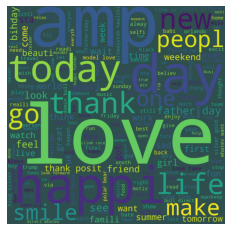

In [ ]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='darkslategrey')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##Wordcloud of Most Frequent Words in Hate Speech dataset

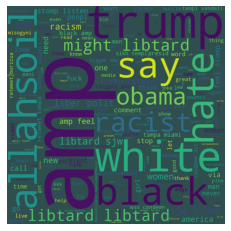

In [ ]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='darkslategrey')
wordcloud = wordcloud.generate(hatred_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
print(corpus)

##Feature Extraction and Training Set Split

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 31000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [5]:
len(X[0])

31000

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 10, max_iter=300)
classifier.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

##Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##Kernel SVM classifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##ANN Classifier


###Building The ANN

In [6]:
from keras.layers import LeakyReLU
ann = tf.keras.models.Sequential()

Using TensorFlow backend.


###Adding Input Layer and first hidden layer

In [7]:
from tensorflow.keras import regularizers

#ann.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
#ann.add(tf.keras.layers.Dropout(0.3))
#ann.add(tf.keras.layers.Dropout(0.3))
#ann.add(tf.keras.layers.LeakyReLU(alpha=0.05))

###Adding the second hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#ann.add(tf.keras.layers.Dropout(0.3))
#ann.add(tf.keras.layers.LeakyReLU(alpha=0.05))

###Adding Output Layer

In [9]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

###Compiling the ANN

In [10]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.TruePositives()])

###Training the ANN

In [11]:
ann.fit(X_train, y_train, batch_size = 1, epochs = 10)

Epoch 1/10
25569/25569 [==============================] - 279s 11ms/step - loss: 0.1554 - true_positives: 764.0000
Epoch 2/10
25569/25569 [==============================] - 279s 11ms/step - loss: 0.0769 - true_positives: 1395.0000
Epoch 3/10
25569/25569 [==============================] - 278s 11ms/step - loss: 0.0404 - true_positives: 1625.0000
Epoch 4/10
25569/25569 [==============================] - 278s 11ms/step - loss: 0.0214 - true_positives: 1732.0000
Epoch 5/10
25569/25569 [==============================] - 279s 11ms/step - loss: 0.0128 - true_positives: 1776.0000
Epoch 6/10
25569/25569 [==============================] - 278s 11ms/step - loss: 0.0088 - true_positives: 1790.0000
Epoch 7/10
25569/25569 [==============================] - 278s 11ms/step - loss: 0.0087 - true_positives: 1801.0000
Epoch 8/10
25569/25569 [==============================] - 278s 11ms/step - loss: 0.0070 - true_positives: 1807.0000
Epoch 9/10
25569/25569 [==============================] - 278s 11ms/step 

##Prediction Matrix

In [12]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#y_prob = classifier.predict_proba(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


##Adjusting Inverse of Regularisation Strength for Logistic Regression

In [ ]:
from sklearn.metrics import f1_score
threshold = np.arange(0.1,0.9,0.1)
score = [f1_score(y_test, ((y_prob[:,1] >= x).astype(int))) for x in threshold]

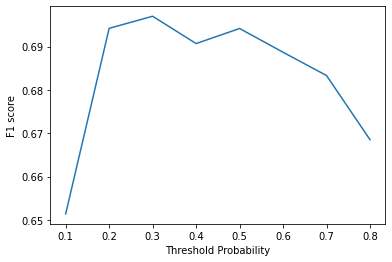

In [ ]:
plt.plot(threshold, score)
plt.xlabel('Threshold Probability')
plt.ylabel('F1 score')
plt.show()

##Accuracy, F1 Score, Avg precision Score, Precision Score, Matthew's Correlation Coefficient 

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5936   49]
 [ 179  229]]


0.9643359924917879

In [20]:
from sklearn.metrics import f1_score
f1S = f1_score(y_test, y_pred, average='binary')
print('f1score : ', f1S)

f1score :  0.6676384839650146


In [21]:
from sklearn.metrics import average_precision_score
apS = average_precision_score(y_test, y_pred)
print('Average Precision Score : ', apS)

Average Precision Score :  0.490344204333996


In [22]:
from sklearn.metrics import precision_score
PSs = precision_score(y_test, y_pred, average='binary')
print('Precision Score : ',PSs)

Precision Score :  0.8237410071942446


In [23]:
from sklearn.metrics import recall_score
Rs = recall_score(y_test, y_pred, average='binary')
print('Recall Score : ',Rs)

Recall Score :  0.5612745098039216


In [24]:
from sklearn.metrics import matthews_corrcoef
MCC = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient : ',MCC)

Matthews Correlation Coefficient :  0.6628805491014934


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.82      0.56      0.67       408

    accuracy                           0.96      6393
   macro avg       0.90      0.78      0.82      6393
weighted avg       0.96      0.96      0.96      6393

